### *Food*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = {'이름': ['오렌지', '포도', '견과류', '새우', '생선', '콩', '베이컨', '바나나', '배', '오이', '치즈', '당근', '사과', '샐러리', '양상추'],
        '당도': [7, 8, 3, 2, 3, 3, 1, 10, 10, 2, 1, 5, 10, 3, 1],
        '아삭함': [3, 5, 6, 3, 1, 7, 4, 1, 7, 8, 1, 10, 9, 10, 9],
        '종류': ['과일', '과일', '단백질', '단백질', '단백질', '채소', '단백질', '과일', '과일', '채소', '단백질', '채소', '과일', '채소', '채소']}

df = pd.DataFrame(data)
df

,이름,당도,아삭함,종류
0,오렌지,7,3,과일
1,포도,8,5,과일
2,견과류,3,6,단백질
3,새우,2,3,단백질
4,생선,3,1,단백질
5,콩,3,7,채소
6,베이컨,1,4,단백질
7,바나나,10,1,과일
8,배,10,7,과일
9,오이,2,8,채소


In [3]:
newdf = df.copy()
newdf

,이름,당도,아삭함,종류
0,오렌지,7,3,과일
1,포도,8,5,과일
2,견과류,3,6,단백질
3,새우,2,3,단백질
4,생선,3,1,단백질
5,콩,3,7,채소
6,베이컨,1,4,단백질
7,바나나,10,1,과일
8,배,10,7,과일
9,오이,2,8,채소


In [4]:
df.drop(['이름', '종류'], axis=1, inplace=True)
df

,당도,아삭함
0,7,3
1,8,5
2,3,6
3,2,3
4,3,1
5,3,7
6,1,4
7,10,1
8,10,7
9,2,8


### *KMeans*

In [5]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=2)
kmeans.fit(df)

print(f'cluster{kmeans.labels_}')
print(f'중심점: {kmeans.cluster_centers_}')
#print(kmeans.n_iter_)
print(f'응집도: {kmeans.inertia_}')
kmeans.score(df)

cluster[1 1 0 0 0 0 0 1 1 0 0 0 1 0 0]
중심점: [[2.4 5.9]
 [9.  5. ]]
응집도: 171.29999999999998


-171.29999999999998

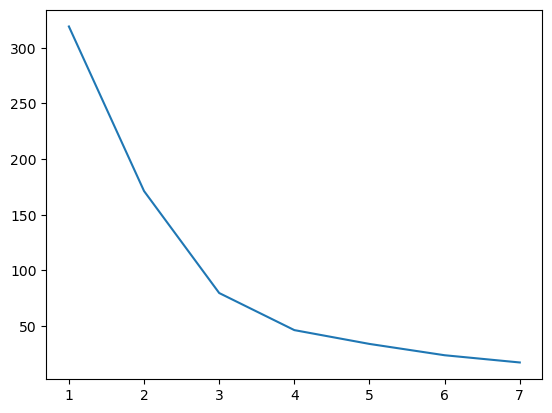

In [6]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

iris = df
temp=[]
for i in range(1,8):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(iris)
  temp.append(kmeans.inertia_)
plt.plot(range(1,8),temp)

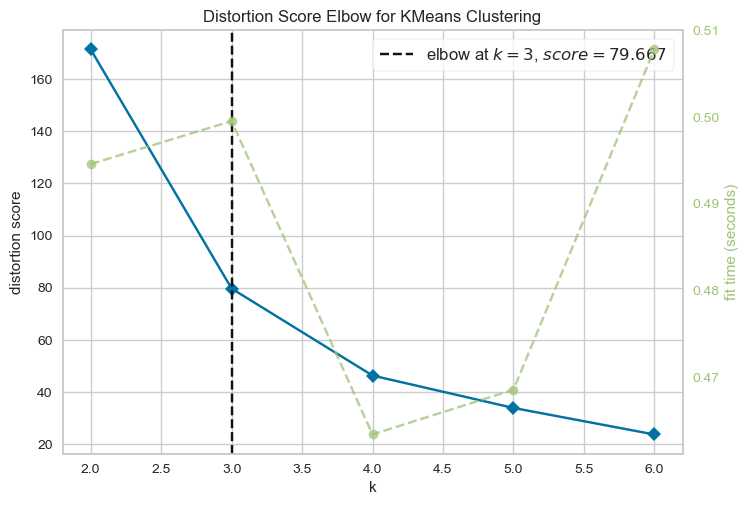

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
iris = df

visualizer = KElbowVisualizer(KMeans(), k=(2,7))
visualizer.fit(iris) 
visualizer.show() 

### *Hierarchical Clustering*

Text(0, 0.5, 'distance')

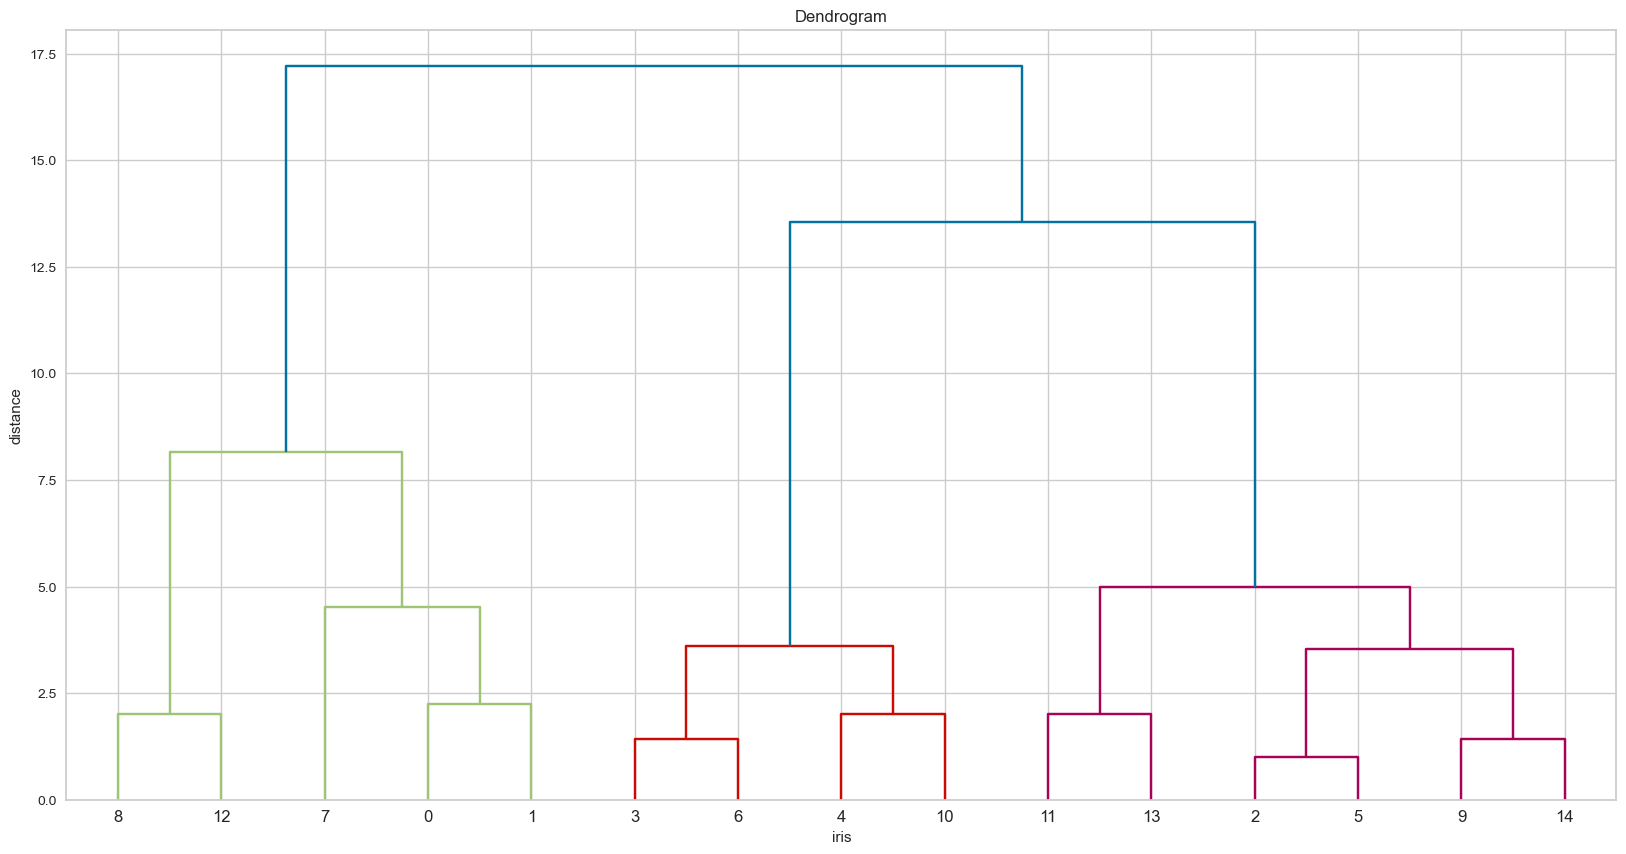

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
iris = df
plt.figure(figsize=(20,10))
cluster=linkage(iris, method='ward')

dendrogram(cluster)
plt.title('Dendrogram')
plt.xlabel('iris')
plt.ylabel('distance')

In [9]:
from sklearn.cluster import AgglomerativeClustering # cluster 개수 설정
iris = df
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward') # ward는 새 cluster 분산 최소화.
cluster.fit_predict(iris)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

### *KNN*

In [10]:
newdf

,이름,당도,아삭함,종류
0,오렌지,7,3,과일
1,포도,8,5,과일
2,견과류,3,6,단백질
3,새우,2,3,단백질
4,생선,3,1,단백질
5,콩,3,7,채소
6,베이컨,1,4,단백질
7,바나나,10,1,과일
8,배,10,7,과일
9,오이,2,8,채소


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_encoded = le.fit_transform(newdf['종류'])
label_encoded

array([0, 0, 1, 1, 1, 2, 1, 0, 0, 2, 1, 2, 0, 2, 2])

In [12]:
label_encoded = pd.DataFrame(label_encoded, columns=['label_encoded'])
label_encoded

,label_encoded
0,0
1,0
2,1
3,1
4,1
5,2
6,1
7,0
8,0
9,2


In [13]:
data = pd.concat([newdf, label_encoded], axis=1)
data

,이름,당도,아삭함,종류,label_encoded
0,오렌지,7,3,과일,0
1,포도,8,5,과일,0
2,견과류,3,6,단백질,1
3,새우,2,3,단백질,1
4,생선,3,1,단백질,1
5,콩,3,7,채소,2
6,베이컨,1,4,단백질,1
7,바나나,10,1,과일,0
8,배,10,7,과일,0
9,오이,2,8,채소,2


In [14]:
x=data[['당도', '아삭함']]
y=data['label_encoded']

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape)
print(x_test.shape)

(12, 2)
(3, 2)


In [16]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)
print(f'클래스의 종류:{neigh.classes_}')
print(f'거리계산방법:{neigh.effective_metric_}')
print(f'훈련데이터 샘플 수:{neigh.n_samples_fit_}')

클래스의 종류:[0 1 2]
거리계산방법:euclidean
훈련데이터 샘플 수:12


In [17]:
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier()
scores=cross_val_score(knn,x_train,y_train,cv=4, scoring='accuracy')

for i in range(scores.size):
    print(f"{i+1}번째 정확도: {scores[i]}")

1번째 정확도: 0.6666666666666666
2번째 정확도: 0.6666666666666666
3번째 정확도: 0.6666666666666666
4번째 정확도: 1.0


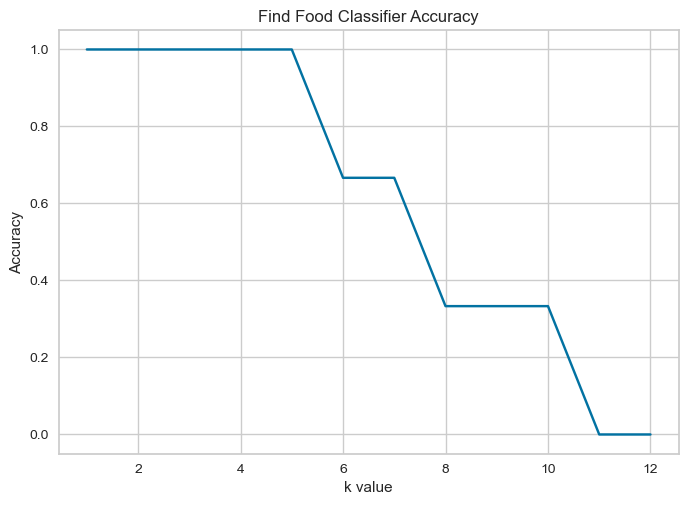

In [18]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 13)
find_accuracy = []

for k in k_range:
  find_model = KNeighborsClassifier(n_neighbors = k)
  find_model.fit(x_train, y_train.values.ravel())

  find_accuracy.append(find_model.score(x_test, y_test))
  
plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Find Food Classifier Accuracy")
plt.show()